<a href="https://colab.research.google.com/github/RakeshDhamathotti/Iris-flower-classification-/blob/main/bank%20Customer%20churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(' https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [5]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [9]:
data.duplicated ('CustomerId').sum()

0

In [10]:
data=data.set_index('CustomerId')

In [11]:
data.head()


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [13]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
data.replace({'Geography':{'France': 0,'Germany': 1,'Spain': 2}},inplace=True)

In [15]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
data.replace({'Gender':{'Female':0,'Male':1}},inplace=True)

In [17]:
data['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [18]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data.replace({'Num Of Products':{'1':0,'2':1,'3':1,'4':1}},inplace=True)

In [20]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
data.loc[(data['Balance']==0),'Churn'].value_counts

<bound method IndexOpsMixin.value_counts of CustomerId
15634602    1
15701354    0
15592531    0
15737173    0
15632264    0
           ..
15605622    0
15657105    0
15719294    0
15606229    0
15584532    1
Name: Churn, Length: 3617, dtype: int64>

In [23]:
data['Zero Balance']=np.where(data['Balance']>0,1,0)

<Axes: >

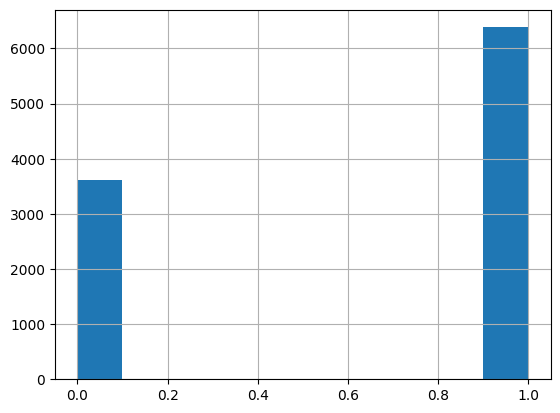

In [24]:
data['Zero Balance'].hist()

In [25]:
data.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             4204         4204    4204  4204    4204     4204   
      1             1695         1695    1695  1695    1695     1695   
      2             2064         2064    2064  2064    2064     2064   
1     0              810          810     810   810     810      810   
      1              814          814     814   814     814      814   
      2              413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     4204             4204              4204   
      1                     1695             1695              1695   
      2                     2064             2064              2064   
1     0                      810              810               810   
      1                      814              814               814   
      2                      413              413               413   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      4204          4204  
      1                      1695          1695  
      2                      2064          2064  
1     0                       810           810  
      1                       814           814  
      2                       413           413

In [27]:
Y=data['Churn']

In [28]:
X=data.drop(['Surname','Churn'],axis=1)

In [29]:
print(Y)

CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
           ..
15606229    0
15569892    0
15584532    1
15682355    1
15628319    0
Name: Churn, Length: 10000, dtype: int64


In [30]:
print(X)

            CreditScore  Geography  Gender  Age  Tenure    Balance  \
CustomerId                                                           
15634602            619          0       0   42       2       0.00   
15647311            608          2       0   41       1   83807.86   
15619304            502          0       0   42       8  159660.80   
15701354            699          0       0   39       1       0.00   
15737888            850          2       0   43       2  125510.82   
...                 ...        ...     ...  ...     ...        ...   
15606229            771          0       1   39       5       0.00   
15569892            516          0       1   35      10   57369.61   
15584532            709          0       0   36       7       0.00   
15682355            772          1       1   42       3   75075.31   
15628319            792          0       0   28       4  130142.79   

            Num Of Products  Has Credit Card  Is Active Member  \
CustomerId             

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [32]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [33]:
model.fit(X_train,Y_train)

LogisticRegression()

In [34]:
Y_predict=model.predict(X_test)
print(Y_predict)

[0 0 0 ... 0 0 0]


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict)

0.789